# Knocking out the MVA pathway

The MVA pathway is endogenous to the yeast model. In order to knock out this pathway completely to prevent any possible formation of lycopene, we knocked out reactions specific to lycopene synthesis and not involved with any metabolic processes. (R)-5-diphosphomevalonic acid is a key intermediate within lycopene production that is converted into IPP. We knocked out reactions r_0739 and r_0904 which involve converting (R)-5-diphosphomevalonic acid into IPP, which shuts down lycopene synthesis. IPP is specific to secondary metabolite synthesis and plays no role in metabolism.  

###  Turning off (R)-5-diphosphomevalonic acid conversion to IPP is key to turn off lycopene production
All reactions in the lycopene synthesis path were investigated to determine reactions that would turn off lycopene production but have no effect on metabolism. The prevention of reactions involving (R)-5-diphosphomevalonic acid seemed most promising. This intermediate in lycopene synthesis is only involved in two reactions r_0739 and r_0904 (unlike other intermediates in lycopene synthesis which are involved in many reactions). Reaction r_0739 involves converting (R)-5-diphosphomevalonic acid into IPP and CO2 using ATP. Reaction r_0904 apparently only involves burning ATP (look at the stoichiometry in the last cell of this section below).

for m in model.metabolites.query("C6H10O10P2", 'formula'):
       print(m, m.name)
<br />s_0018[c] (R)-5-diphosphomevalonic acid [cytoplasm]

**model.metabolites.get_by_id('s_0018[c]')**
<br />Name	(R)-5-diphosphomevalonic acid [cytoplasm]
<br />In 2 reaction(s)	r_0904, r_0739

**model.reactions.get_by_id('r_0739')**
<br />mevalonate pyrophoshate decarboxylase
<br />s_0018[c] + s_0434[c] --> IPP + s_0394[c] + s_0456[c] + s_1322[c]
<br />(R)-5-diphosphomevalonic acid [cytoplasm] + ATP [cytoplasm] --> isopentenyl diphosphate [cytoplasm] + ADP [cytoplasm] + carbon dioxide [cytoplasm] + phosphate [cytoplasm]

**model.reactions.get_by_id('r_0904')**
<br /> s_0019[c] + s_0434[c] --> s_0018[c] + s_0394[c]
<br /> (R)-5-phosphomevalonic acid [cytoplasm] + ATP [cytoplasm] --> (R)-5-diphosphomevalonic acid [cytoplasm] + ADP [cytoplasm]

### Prevention of IPP formation should shut down only lycopene production and not metabolism
Listed below are all reactions that IPP is involved with in the model. IPP synthesis occurs only when (R)-5-diphosphomevalonic acid [cytoplasm] + ATP [cytoplasm] are used as substrates. All reactions in the model that use IPP as a substrate result in the synthesis of intermediates of secondary metabolite terpenes, not with metabolism. Thus, blocking the formation of IPP should not affect cellular metabolism but only prevent the formation of lycopene and secondary metabolites. We should see no lycopene production and no change in biomass formation when IPP formation is prevented by blocking the two reactions in the model that result in the synthesis of (R)-5-diphosphomevalonic acid.

model.metabolites.get_by_id('IPP')
r_0667, r_0462, r_0373, r_0739, r_0461, r_1182, r_0355

model.reactions.get_by_id('r_0667')
isopentenyl diphosphate [cytoplasm] <=> prenyl diphosphate(3-) [cytoplasm]

model.reactions.get_by_id('r_0462')
isopentenyl diphosphate [cytoplasm] + geranyl diphosphate [cytoplasm] --> farnesyl diphosphate [cytoplasm] + diphosphate [cytoplasm]

model.reactions.get_by_id('r_0739')
(R)-5-diphosphomevalonic acid [cytoplasm] + ATP [cytoplasm] --> isopentenyl diphosphate [cytoplasm] + ADP [cytoplasm] + carbon dioxide [cytoplasm] + phosphate [cytoplasm]

model.reactions.get_by_id('r_0373')
isopentenyl diphosphate [cytoplasm] + farnesyl diphosphate [cytoplasm] --> geranylgeranyl diphosphate [cytoplasm] + diphosphate [cytoplasm]

model.reactions.get_by_id('r_1182')
isopentenyl diphosphate [cytoplasm] <=> isopentenyl diphosphate [mitochondrion]

model.reactions.get_by_id('r_0461')
isopentenyl diphosphate [cytoplasm] + geranylgeranyl diphosphate [cytoplasm] --> diphosphate [cytoplasm] + pentaprenyl diphosphate [cytoplasm]

model.reactions.get_by_id('r_0355')
isopentenyl diphosphate [cytoplasm] + prenyl diphosphate(3-) [cytoplasm] --> diphosphate [cytoplasm] + geranyl diphosphate [cytoplasm]

# The Coding

**Loading the GSM with no modifications**

In [1]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite, Model

model = read_sbml_model('GSM_no_additions.xml')

**Defining metabolites to be incorporated in lycopene pathway**

As well as renaming metabolite IDs for convenience

In [2]:
ipp = model.metabolites.get_by_id('s_0943[c]') # IPP already in model
ipp.id = "IPP"

In [3]:
dmapp = model.metabolites.get_by_id('s_1376[c]') # DMAPP is denoted as "prenyl diphosphate (3-)" in the model
dmapp.id = "DMAPP"

In [4]:
gpp = model.metabolites.get_by_id('s_0745[c]') # Geranyl-PP already in model
gpp.id = "GPP"

In [5]:
farnpp = model.metabolites.get_by_id('s_0190[c]') # Farnesyl-PP already in model
farnpp.id = "FPP"

In [6]:
ggpp = model.metabolites.get_by_id('s_0189[c]') # GGPP is already found naturally in model as metabolite s_0189[c]
ggpp.id = "GGPP"

In [7]:
phytoene = Metabolite(id='phytoene', compartment = 'c', name='Phytoene', formula = 'C40H64')

In [8]:
lycopene = Metabolite(id='lycopene', compartment = 'c', name='Lycopene', formula='C40H56')

In [9]:
# Readily available variables for our reactions

NAD = model.metabolites.get_by_id('s_1198[c]')
NAD.id = "NAD_c"

NADH = model.metabolites.get_by_id('s_1203[c]')
NADH.id = "NADH_c"

FAD = model.metabolites.get_by_id('s_0687[c]') 
FAD.id = "FAD_c"

FADH2 = model.metabolites.get_by_id('s_0689[c]') 
FADH2.id = "FADH2_c"

O2 = model.metabolites.get_by_id('s_1275[c]')
O2.id = "O2_c"

H2O = model.metabolites.get_by_id('s_0803[c]')
H2O.id = "H2O_c"

diphosphate = model.metabolites.get_by_id('s_0633[c]')
diphosphate.id = "PPi_c"

In [10]:
# To fix potential problems with indexes the following command is used from the cobra.py package documentation
model.repair()

**Defining reactions of lycopene pathway**

Again, renaming reactions for our convience

In [11]:
isopentenyl_diphosphate_delta_isomerase = model.reactions.get_by_id('r_0667')
isopentenyl_diphosphate_delta_isomerase.id = "IDI"

In [12]:
gp_synthase = model.reactions.get_by_id('r_0355')
gp_synthase.id = "GP_synth"

In [13]:
farnpp_synthase = model.reactions.get_by_id('r_0462')
farnpp_synthase.id = "FPP_synth"

In [14]:
ggpp_synthase = model.reactions.get_by_id('r_0373')
ggpp_synthase.id = "CrtE"

In [15]:
phytoene_synthase = Reaction('CrtB')

In [16]:
phytoene_desaturase = Reaction('CrtI')

**Adding metabolites to heterologous reactions**

In [17]:
phytoene_synthase.add_metabolites(({ggpp: -2,
                                    diphosphate:2,
                                    phytoene: 1}))

In [18]:
phytoene_desaturase.add_metabolites(({phytoene: -1,
                                      FAD:-4,
                                      FADH2:4,
                                      lycopene: 1}))

**Updating model with boundaries for introduced reactions**

In [19]:
model.add_reactions([phytoene_synthase])
model.add_reactions([phytoene_desaturase])

In [20]:
#model.add_boundary(model.metabolites.phytoene, type = 'demand')
model.add_boundary(model.metabolites.lycopene, type = 'demand');

In [21]:
medium_glc_ex = model.reactions.get_by_id('r_1714')
medium = model.medium
with model:
    model.objective = model.reactions.CrtI
    lycopene_production = model.optimize().objective_value
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h^-1)')
    
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')
    
    medium[medium_glc_ex.id] = 1000
    model.medium = medium

    lycopene_production = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h*^-1)')
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')

At glucose concentration = 1.0:
Maximum theoretical productivity of lycopene = 0.0871195699738864 mmol/(gDW*h^-1)
Maximum theoretical yield = 0.0871195699738864 mmol-lyco/mmol-glc

At glucose concentration = 1000:
Maximum theoretical productivity of lycopene = 25.825440917107603 mmol/(gDW*h*^-1)
Maximum theoretical yield = 0.040149082999580754 mmol-lyco/mmol-glc



In [22]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [23]:
# Renaming IDs for exchange reactions needed
glc_exchange = model.reactions.r_1714
o2_exchange = model.reactions.r_1992
growth = model.reactions.r_2111

In [24]:
medium = model.medium

#Amping glucose levels to 1000.0
medium['r_1714'] = 1000
model.reactions.r_1714.bounds = -1000.0, 1000

In [25]:
ppp_biomass = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=growth)
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.0,0.0,14.679623,0.0,0.0,-1000.000000
1,r_1714,0.0,0.0,0.0,15.323794,0.0,0.0,-947.370216
2,r_1714,0.0,0.0,0.0,15.964078,0.0,0.0,-894.740432
3,r_1714,0.0,0.0,0.0,16.604362,0.0,0.0,-842.110648
4,r_1714,0.0,0.0,0.0,17.244646,0.0,0.0,-789.480864
5,r_1714,0.0,0.0,0.0,17.883518,0.0,0.0,-736.851080
6,r_1714,0.0,0.0,0.0,18.522355,0.0,0.0,-684.221296
7,r_1714,0.0,0.0,0.0,19.158407,0.0,0.0,-631.591512
8,r_1714,0.0,0.0,0.0,19.789829,0.0,0.0,-578.961728
9,r_1714,0.0,0.0,0.0,18.933901,0.0,0.0,-526.331944


<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Biomass objective'>

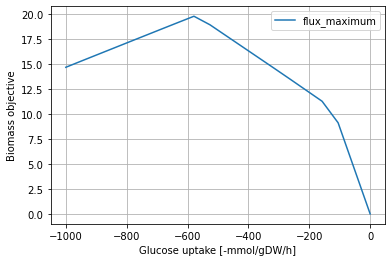

In [26]:
ppp_biomass.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Biomass objective", grid = True)

In [27]:
ppp_lycopene = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=model.reactions.CrtI)
ppp_lycopene

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,5.027443e-16,NaN,24.981325,6.162060e-01,NaN,-1000.000000
1,r_1714,0.0,5.398013e-16,NaN,25.779807,6.712285e-01,NaN,-947.370216
2,r_1714,0.0,5.812179e-16,NaN,25.825441,7.119691e-01,NaN,-894.740432
3,r_1714,0.0,6.278112e-16,NaN,25.825441,7.564654e-01,NaN,-842.110648
4,r_1714,0.0,6.806168e-16,NaN,25.825441,8.068942e-01,NaN,-789.480864
5,r_1714,0.0,7.409657e-16,NaN,25.825441,8.645268e-01,NaN,-736.851080
6,r_1714,0.0,8.105985e-16,NaN,25.825441,9.310256e-01,NaN,-684.221296
7,r_1714,0.0,8.918362e-16,NaN,25.810275,1.008015e+00,NaN,-631.591512
8,r_1714,0.0,9.878436e-16,NaN,25.523052,1.087410e+00,NaN,-578.961728
9,r_1714,0.0,1.103051e-15,NaN,25.167446,1.179478e+00,NaN,-526.331944


<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Lycopene objective'>

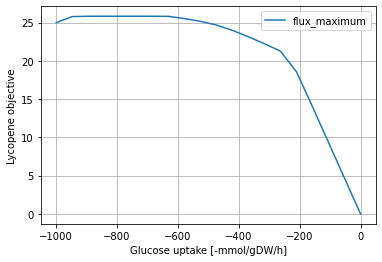

In [28]:
ppp_lycopene.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Lycopene objective", grid=True)

In [29]:
from cobra.io import write_sbml_model
write_sbml_model(model,"yeast_lyco_MVA.xml")

In [30]:
model = read_sbml_model('yeast_lyco_MVA.xml')

In [31]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite, Model

model = read_sbml_model('yeast_lyco_MVA.xml')

**Turning off the conversion of (R)-5-diphosphomevalonic acid into IPP**

In [32]:
model.reactions.r_0739.lower_bound = 0
model.reactions.r_0739.upper_bound = 0

In [33]:
model.reactions.r_0163.lower_bound = -500;
model.reactions.r_0163.upper_bound = 1000

In [34]:
model.reactions.r_2116.lower_bound = -500;
model.reactions.r_2116.upper_bound = 1000

In [35]:
medium_glc_ex = model.reactions.get_by_id('r_1714')
medium = model.medium
medium['r_1714'] = 1
model.reactions.r_1714.bounds = -1000.0, 1000
with model:
    model.objective = model.reactions.CrtI
    lycopene_production = model.optimize().objective_value
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h^-1)')
    
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')
    
    medium[medium_glc_ex.id] = 1000
    model.medium = medium

    lycopene_production = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h*^-1)')
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')

At glucose concentration = 1:
Maximum theoretical productivity of lycopene = 5.91157367879208e-34 mmol/(gDW*h^-1)
Maximum theoretical yield = 3.827321701755104e-33 mmol-lyco/mmol-glc

At glucose concentration = 1000:
Maximum theoretical productivity of lycopene = 5.91157367879208e-34 mmol/(gDW*h*^-1)
Maximum theoretical yield = 3.827321701755104e-33 mmol-lyco/mmol-glc



<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Biomass objective'>

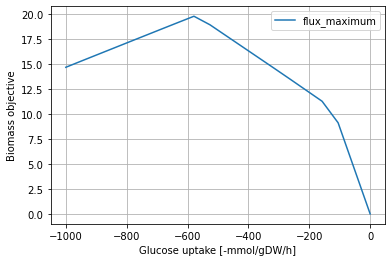

In [36]:
ppp_biomass.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Biomass objective", grid = True)

In [37]:
ppp_lycopene = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=model.reactions.CrtI)
ppp_lycopene

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,34.372542,NaN,0.0,NaN,NaN,-1000.000000
1,r_1714,0.0,34.372542,NaN,0.0,NaN,NaN,-947.368421
2,r_1714,0.0,34.372542,NaN,0.0,NaN,NaN,-894.736842
3,r_1714,0.0,34.372542,NaN,0.0,NaN,NaN,-842.105263
4,r_1714,0.0,34.372542,NaN,0.0,NaN,NaN,-789.473684
5,r_1714,0.0,34.372542,NaN,0.0,NaN,NaN,-736.842105
6,r_1714,0.0,34.372542,NaN,0.0,NaN,NaN,-684.210526
7,r_1714,0.0,34.372542,NaN,0.0,NaN,NaN,-631.578947
8,r_1714,0.0,34.372542,NaN,0.0,NaN,NaN,-578.947368
9,r_1714,0.0,34.372542,NaN,0.0,NaN,NaN,-526.315789


<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Lycopene objective'>

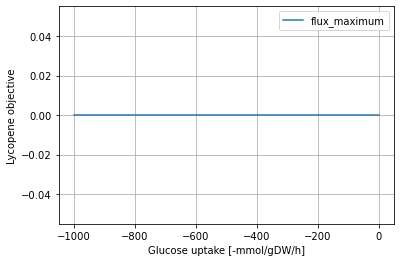

In [38]:
ppp_lycopene.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Lycopene objective", grid=True)

In [39]:
from cobra.io import write_sbml_model
write_sbml_model(model,"yeast_lyco_NO_MVA.xml")